# Pymaceuticals Inc.
---

### Analysis

- Observation 1:
    In the number of mice per drug regimen the two highly used treatment was Ramicane and Capomulin. The other drugs used were steadily divided between the mice with the exception of Propriva being used less.
- Observation 2:
    On the pie plot, it was surprising to see th gender count to be split almost even between male and female. With the male at 50.96% and female at 49.04%     
- Observation 3:
    In the scatter plot of tumor volume versus mouses weight for Capomilin treatment regimen you can see that the weight of the mouse made an increasing difference withing the tumor volume as the mouses weight was heavier.
    
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Mice_data_complete = pd.merge (study_results, mouse_metadata)


# Display the data table for preview
Mice_data_complete.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
name_of_mice = Mice_data_complete["Mouse ID"].value_counts()
name_of_mice

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
name_of_mice_df = pd.DataFrame(name_of_mice)
name_of_mice_df

,Mouse ID
g989,13
b128,10
q787,10
s337,10
q511,10
...,...
f932,1
b447,1
u153,1
t573,1


In [4]:
# Checking the number of mice.
mice_count = name_of_mice_df.count()
mice_count

Mouse ID    249
dtype: int64

In [5]:
duplicates =Mice_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Mice_data_complete['Mouse ID'].unique()
duplicate_mice

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = Mice_data_complete.loc[duplicates,:]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for mouse_id in duplicate_mice:
    removed_duplicates_df=Mice_data_complete[Mice_data_complete['Mouse ID'] != mouse_id] 
removed_duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1878,f966,0,45.000000,0,Capomulin,Male,16,17
1879,f966,5,38.796474,0,Capomulin,Male,16,17
1880,f966,10,35.624403,0,Capomulin,Male,16,17
1881,f966,15,32.623003,0,Capomulin,Male,16,17


In [9]:
number_mice_check = removed_duplicates_df["Mouse ID"].nunique()
number_mice_check

248

## Summary Statistics

In [10]:
Drug_regimen_df = Mice_data_complete.groupby(["Drug Regimen"])
Drug_regimen_df

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


Drug_regimen_df = Mice_data_complete.groupby(["Drug Regimen"])
Mean_tumor_volume = Drug_regimen_df["Tumor Volume (mm3)"].mean()
Median_tumor_volume =Drug_regimen_df["Tumor Volume (mm3)"].median()
Stand_dev_tumor_volume= Drug_regimen_df["Tumor Volume (mm3)"].std()
SEM_tumor_volume = Drug_regimen_df["Tumor Volume (mm3)"].sem()
var_tumor_volume = Drug_regimen_df["Tumor Volume (mm3)"].var()


# Assemble the resulting series into a single summary DataFrame.

summary_stat_list = {'Mean Tumor Volume': Mean_tumor_volume, 
                     'Median Tumor Volume': Median_tumor_volume,
                     'Tumor Volume Variance':var_tumor_volume,
                     'Tumor Volume Std. Dev.':Stand_dev_tumor_volume,
                     'Tumor Volume Std. Err.':SEM_tumor_volume}
summary_stat = pd.DataFrame(summary_stat_list)
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_df =  Drug_regimen_df["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df.columns =pd.MultiIndex.from_product([['Tumor Volume (mm3)'], agg_df.columns])
agg_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

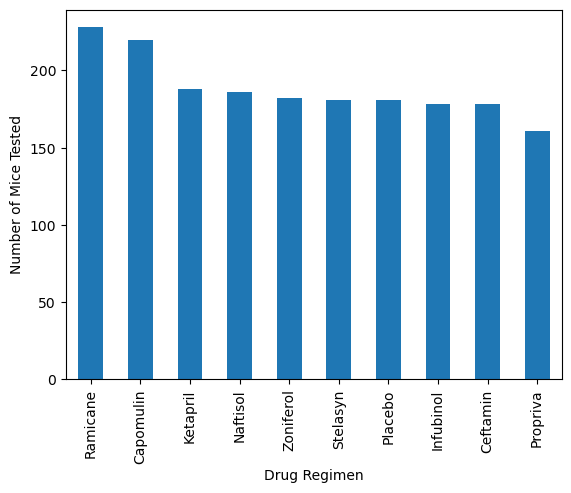

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Mice_per_drug_count = removed_duplicates_df['Drug Regimen'].value_counts()
Mice_per_drug_count 

Mice_per_drug_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Mice Tested')

<function matplotlib.pyplot.show(close=None, block=None)>

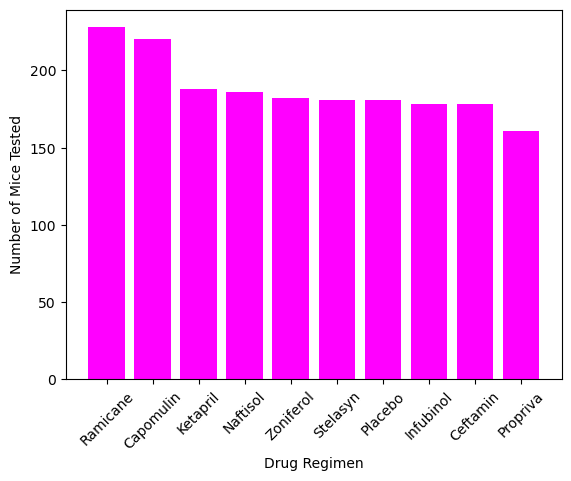

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


plt.bar(Mice_per_drug_count.index, Mice_per_drug_count.values, color = 'magenta')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=45)
plt.show

<Axes: title={'center': 'Male vs Female Mice'}, ylabel='Sex'>

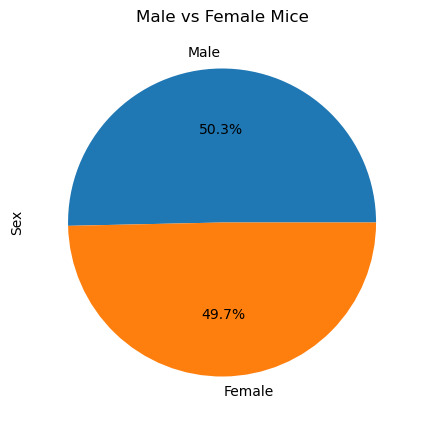

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = removed_duplicates_df['Sex'].value_counts()
plt.figure(figsize=(5, 5))
sex_counts.plot(kind='pie', autopct='%1.1f%%',title='Male vs Female Mice')

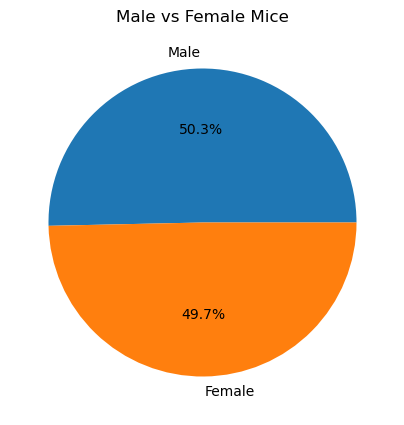

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Male vs Female Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = removed_duplicates_df.groupby('Mouse ID')['Timepoint'].max()
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)


In [17]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Tumor_volume = pd.merge(greatest_timepoint_df, removed_duplicates_df, on=['Mouse ID', 'Timepoint'])
Tumor_volume 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_regimen: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Tumor_Vol = Tumor_volume.loc[Tumor_volume ['Drug Regimen'] == treatment]
    
    # add subset and append
    TV_add = Tumor_Vol['Tumor Volume (mm3)']
    tumor_vol_data.append(TV_add)
    
    # Determine outliers using upper and lower bounds
    quartiles = TV_add.quantile([.25, .5, .75])
    upper = quartiles[.75]
    lower = quartiles[.25]
    equation = upper - lower 
    lower_bound = lower - (1.5*equation)
    upper_bound = upper + (1.5*equation)
    outliers = TV_add.loc[(TV_add < lower_bound) | (TV_add > upper_bound)]
    
    print(f"{treatment}'s potential outliers are: {outliers}")
    


Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


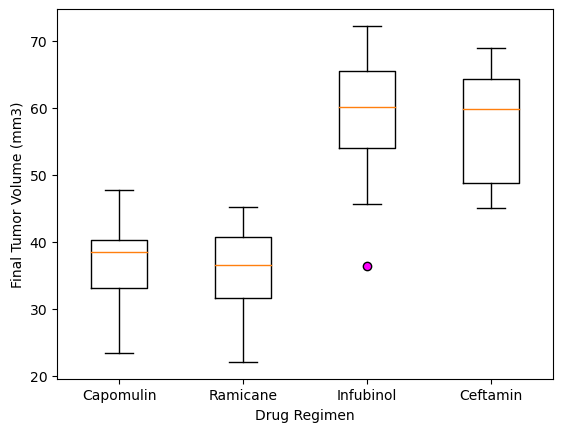

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()

red_dot = dict(markerfacecolor='magenta', marker='o')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(tumor_vol_data, labels = treatment_regimen, flierprops=red_dot)
plt.show()

## Line and Scatter Plots

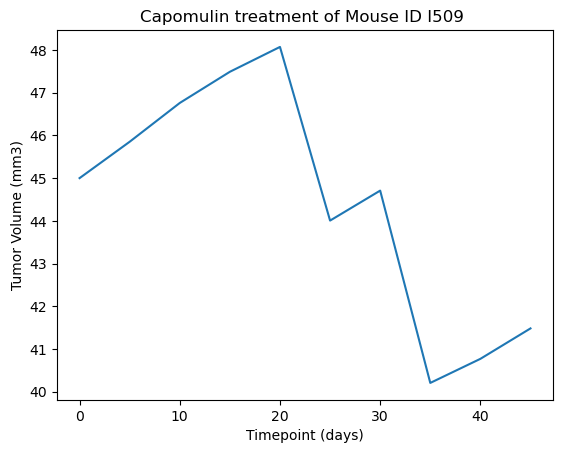

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_treatment = removed_duplicates_df.loc[(removed_duplicates_df["Drug Regimen"] == "Capomulin") & (removed_duplicates_df["Mouse ID"] == "l509")]

plt.plot(Capomulin_treatment["Timepoint"],Capomulin_treatment["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of Mouse ID I509 ")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

/var/folders/sl/cvpscrb57bx1bqqjv4ff1vz80000gn/T/ipykernel_5533/2137869407.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_mean = Cap_clean.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]


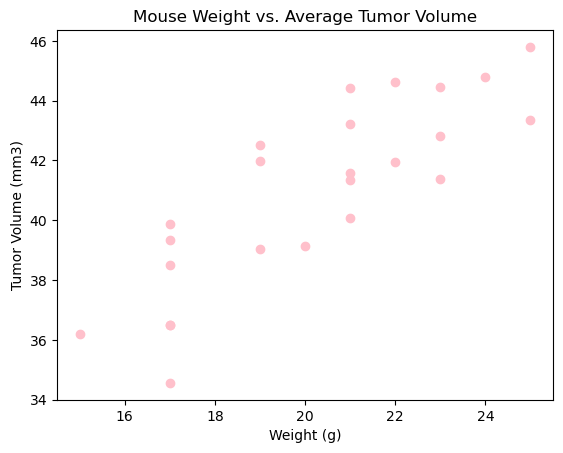

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Cap_clean = removed_duplicates_df.loc[removed_duplicates_df["Drug Regimen"] == "Capomulin",:]

Capomulin_mean = Cap_clean.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]

plt.scatter(Capomulin_mean['Weight (g)'], Capomulin_mean['Tumor Volume (mm3)'], color = "pink")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [22]:
st.linregress(Capomulin_mean["Weight (g)"],Capomulin_mean["Tumor Volume (mm3)"])

LinregressResult(slope=0.9033778263723188, intercept=22.708253474262623, rvalue=0.8387576273452764, pvalue=3.0680091744819394e-07, stderr=0.1250326503827445, intercept_stderr=2.5557888964716344)

In [42]:
Cap_weight
Cap_W = (22.0, 21.0, 17.0, 19.0, 22.0, 24.0, 20.0, 23.0, 21.0, 21.0, 19.0, 19.0, 25.0, 17.0, 25.0, 17.0, 23.0, 17.0,
17.0, 21.0, 23.0, 21.0, 15.0, 17.0)


(22.0,
 21.0,
 17.0,
 19.0,
 22.0,
 24.0,
 20.0,
 23.0,
 21.0,
 21.0,
 19.0,
 19.0,
 25.0,
 17.0,
 25.0,
 17.0,
 23.0,
 17.0,
 17.0,
 21.0,
 23.0,
 21.0,
 15.0,
 17.0)

In [44]:
Cap_Vol
Cap_V = (41.963636, 40.083699, 36.505973 ,41.990097, 44.613344, 44.805810,39.141053, 44.465236, 43.216925,
         44.434474, 42.507261, 39.049816, 45.798970, 36.509212, 43.367364, 34.559143, 42.803733, 39.328725, 
         39.887495, 41.581595, 41.384825,41.352452, 36.182040, 38.506829)
Cap_V

(41.963636,
 40.083699,
 36.505973,
 41.990097,
 44.613344,
 44.80581,
 39.141053,
 44.465236,
 43.216925,
 44.434474,
 42.507261,
 39.049816,
 45.79897,
 36.509212,
 43.367364,
 34.559143,
 42.803733,
 39.328725,
 39.887495,
 41.581595,
 41.384825,
 41.352452,
 36.18204,
 38.506829)

The correlation between mouse weight and the average tumor volume 0.84.


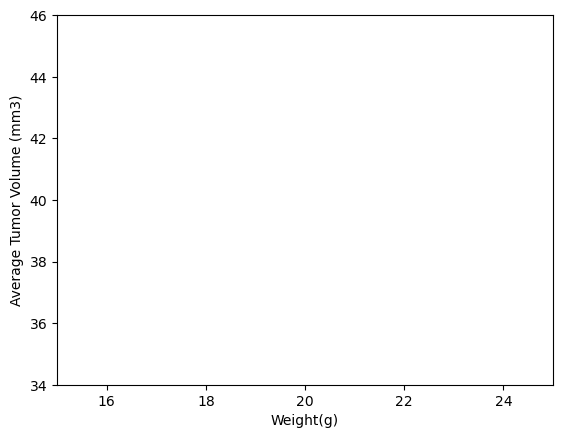

In [47]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

Cap_weight = Capomulin_mean['Weight (g)']
Cap_Vol = Capomulin_mean['Tumor Volume (mm3)']


Weight_Vol = st.pearsonr(Capomulin_mean['Weight (g)'],Capomulin_mean['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume {round(Weight_Vol[0],2)}.")




slope, intercept, rvalue, pvalue, stderr = st.linregress(Cap_weight, Cap_Vol)

regression_values = slope * Cap_weight + intercept

plt.xlim(15,25)
plt.ylim(34,46)
plt.scatter =(Cap_W, Cap_V)
plt.plot = (Cap_weight, regression_values,  "b-")

plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


